# 03_modeling

## Importando bibliotecas

In [1]:
from prophet import Prophet
import pandas as pd

from prophet.plot import plot_plotly, plot_components_plotly
import plotly.io as pio

c:\Users\heitor\anaconda3\envs\cases_data_science\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Carregando os dados

In [2]:
# 📂 Carregar dados preparados
df = pd.read_csv('../data/processed/store_1_prepared.csv', parse_dates=['Date'])

## Modelagem

In [3]:
# Preparando dados para Prophet
df_prophet = df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

In [4]:
# Criando modelo
model = Prophet()
model.fit(df_prophet)

11:33:40 - cmdstanpy - INFO - Chain [1] start processing
11:33:40 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# Criando datas futuras (30 dias)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
# Salvando previsão
forecast.to_csv('../data/processed/forecast_prophet.csv', index=False)

# Previsões
future = model.make_future_dataframe(periods=48)
forecast_predict = model.predict(future)
forecast_predict.to_csv('../data/processed/forecast_predict.csv')

c:\Users\heitor\anaconda3\envs\cases_data_science\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\heitor\anaconda3\envs\cases_data_science\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\heitor\anaconda3\envs\cases_data_science\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

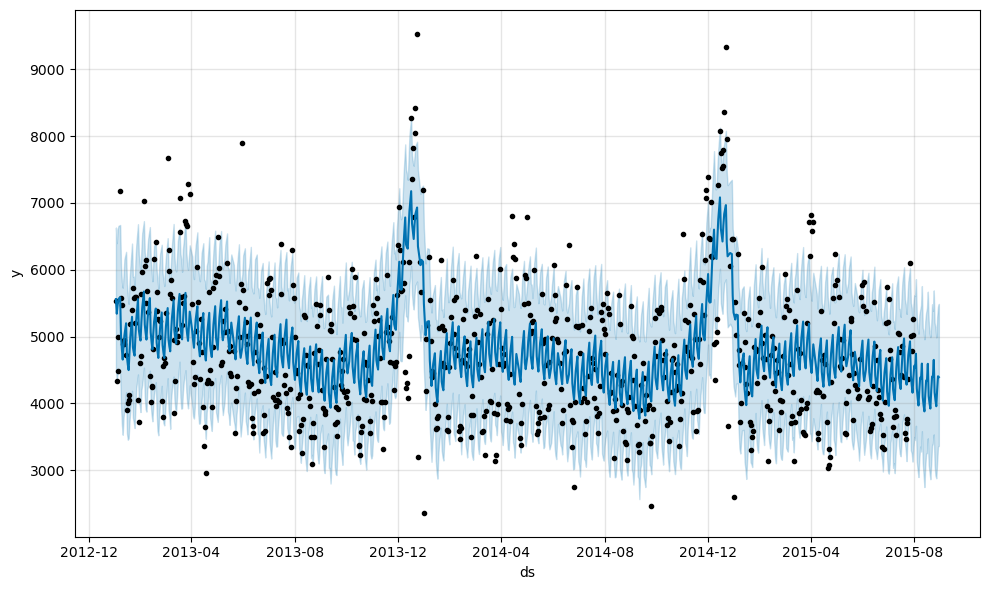

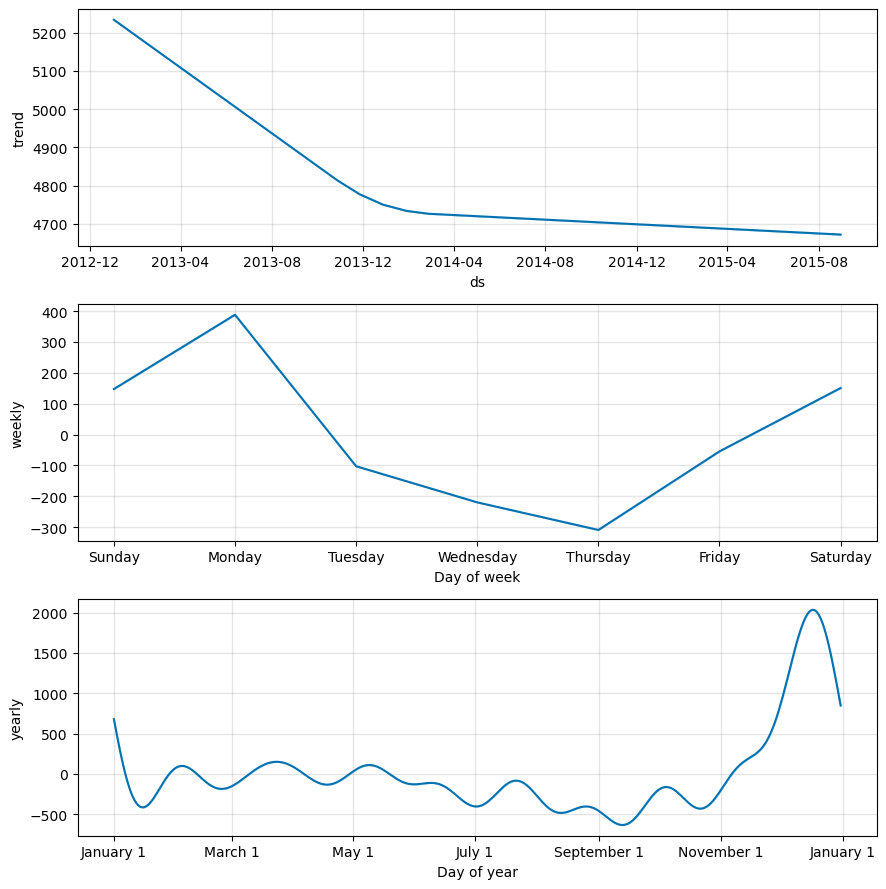

In [6]:
# Visualizando previsão
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [7]:
# Garante que a renderização será feita com Kaleido (necessário para salvar como imagem)
pio.kaleido.scope.default_format = "png"

# Criar as figuras com Plotly
fig1 = plot_plotly(model, forecast)
fig2 = plot_components_plotly(model, forecast)

# Garantir que pasta existe
import os
os.makedirs("../reports/figures", exist_ok=True)

# Salvar as figuras como imagens
fig1.write_image("../reports/figures/forecast_plot.png")
fig2.write_image("../reports/figures/forecast_components.png")

# Exibe no notebook (opcional)
fig1.show()
fig2.show()

c:\Users\heitor\anaconda3\envs\cases_data_science\lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

